In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [56]:
DATA_PATH = "/home/tathgat/Documents/churn_project/data/raw/customer_churn.csv"
REPORT_DIR = "/home/tathgat/Documents/churn_project/reports/eda/"
TARGET = "churn"   

In [54]:
os.makedirs(REPORT_DIR, exist_ok=True)

In [57]:
# 1. Load data
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
print(df.dtypes)

Shape: (7043, 33)
CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


In [58]:
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values:\n", missing)


Missing values:
 Churn Reason         5174
CustomerID              0
Count                   0
State                   0
Country                 0
Zip Code                0
Lat Long                0
Latitude                0
City                    0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Longitude               0
Internet Service        0
Online Security         0
Device Protection       0
Online Backup           0
Streaming TV            0
Streaming Movies        0
Contract                0
Tech Support            0
Paperless Billing       0
Payment Method          0
Total Charges           0
Monthly Charges         0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
dtype: int64


In [59]:
desc = df.describe(include="all")
desc.to_csv(os.path.join(REPORT_DIR, "summary_stats.csv"))

In [61]:
for col in df.columns:
    plt.figure(figsize=(9,6))
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], kde=True)
    else:
        sns.countplot(y=df[col])
    plt.title(f"Distribution of {col}")
    plt.savefig(os.path.join(REPORT_DIR, f"{col}_dist.png"))
    plt.close()

In [62]:
df = df.drop(columns=["CustomerID", "Count", "Country", "City", 
                      "State", "Zip Code", "Lat Long", "Phone Service"])

In [63]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df.isnull().sum()

Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [64]:
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})


In [65]:
pd.get_dummies(df["Contract"], drop_first=True)


,One year,Two year
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7038,False,True
7039,True,False
7040,True,False
7041,False,False


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Monthly Charges", "Total Charges", "Tenure Months"]] = scaler.fit_transform(
    df[["Monthly Charges", "Total Charges", "Tenure Months"]]
)


In [67]:
df.head()


,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,Online Security,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,33.964131,-118.272783,Male,No,0,0,-1.236724,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,-0.362660,-0.959649,Yes,1,86,3239,Competitor made better offer
1,34.059281,-118.307420,Female,No,0,1,-1.236724,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,0.197365,-0.940457,Yes,1,67,2701,Moved
2,34.048013,-118.293953,Female,No,0,1,-0.992402,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,1.159546,-0.645369,Yes,1,86,5372,Moved
3,34.062125,-118.315709,Female,No,1,1,-0.177995,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,1.330711,0.336516,Yes,1,84,5003,Moved
4,34.039224,-118.266293,Male,No,0,1,0.677133,Yes,Fiber optic,No,...,Month-to-month,Yes,Bank transfer (automatic),1.294151,1.214589,Yes,1,89,5340,Competitor had better devices


In [71]:
print(df.columns.tolist())


['Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [72]:
# Use 'Churn Value' as target (already 0/1)
y = df["Churn Value"]

# Drop churn-related leakage columns from features
churn_related = ["Churn Label", "Churn Value", "Churn Score", "Churn Reason"]
X = df.drop(columns=churn_related)


In [75]:
drop_cols = [
    "CustomerID", "Count", "Country", "State", "City",
    "Zip Code", "Lat Long", "Phone Service"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (4930, 21) Val: (1056, 21) Test: (1057, 21)


In [77]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical and numeric columns
numeric_cols = ["Monthly Charges", "Total Charges", "CLTV", "Tenure Months"]
categorical_cols = [c for c in X_train.columns if c not in numeric_cols]

# Preprocessor: impute + scale numerics, impute + one-hot categoricals
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Fit and transform training/validation/test sets
X_train_t = preprocessor.fit_transform(X_train)
X_val_t   = preprocessor.transform(X_val)
X_test_t  = preprocessor.transform(X_test)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_t, y_train)

y_val_pred = log_reg.predict(X_val_t)
y_val_proba = log_reg.predict_proba(X_val_t)[:,1]

print("Validation ROC-AUC:", roc_auc_score(y_val, y_val_proba))
print(classification_report(y_val, y_val_pred))


Validation ROC-AUC: 0.8348904639175257
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       776
           1       0.58      0.57      0.58       280

    accuracy                           0.78      1056
   macro avg       0.72      0.71      0.71      1056
weighted avg       0.78      0.78      0.78      1056



In [79]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train_t, y_train)

y_val_pred_tree = tree.predict(X_val_t)
y_val_proba_tree = tree.predict_proba(X_val_t)[:,1]

print("Validation ROC-AUC:", roc_auc_score(y_val, y_val_proba_tree))
print(classification_report(y_val, y_val_pred_tree))


Validation ROC-AUC: 0.8363217967599411
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       776
           1       0.60      0.63      0.61       280

    accuracy                           0.79      1056
   macro avg       0.73      0.74      0.73      1056
weighted avg       0.79      0.79      0.79      1056



In [83]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_cols = ["Monthly Charges", "Total Charges", "CLTV", "Tenure Months"]
categorical_cols = [c for c in X_train.columns if c not in numeric_cols]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # <-- key fix
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Net (MLP)": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
}


In [85]:
for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", model)])
    
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_val_proba)
    print(f"\n{name}")
    print(f"ROC-AUC: {auc:.3f}")
    print(classification_report(y_val, y_val_pred, digits=3))



Logistic Regression
ROC-AUC: 0.835
              precision    recall  f1-score   support

           0      0.847     0.852     0.850       776
           1      0.583     0.575     0.579       280

    accuracy                          0.778      1056
   macro avg      0.715     0.713     0.714      1056
weighted avg      0.777     0.778     0.778      1056


Decision Tree
ROC-AUC: 0.836
              precision    recall  f1-score   support

           0      0.863     0.847     0.855       776
           1      0.597     0.629     0.612       280

    accuracy                          0.789      1056
   macro avg      0.730     0.738     0.734      1056
weighted avg      0.793     0.789     0.791      1056


Random Forest
ROC-AUC: 0.836
              precision    recall  f1-score   support

           0      0.838     0.892     0.864       776
           1      0.635     0.521     0.573       280

    accuracy                          0.794      1056
   macro avg      0.736     0.70

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Net (MLP)": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
}

results = []

for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", model)])
    
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_val_proba)
    report = classification_report(y_val, y_val_pred, output_dict=True)
    
    results.append({
        "Model": name,
        "ROC-AUC": auc,
        "Accuracy": report["accuracy"],
        "Precision (churn=1)": report["1"]["precision"],
        "Recall (churn=1)": report["1"]["recall"],
        "F1 (churn=1)": report["1"]["f1-score"]
    })


In [87]:
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print(results_df)


                    Model   ROC-AUC  Accuracy  Precision (churn=1)  \
3       Gradient Boosting  0.848974  0.798295             0.641350   
1           Decision Tree  0.836322  0.788826             0.596610   
2           Random Forest  0.835597  0.793561             0.634783   
0     Logistic Regression  0.834890  0.778409             0.583333   
5  Support Vector Machine  0.830380  0.789773             0.617886   
4                 XGBoost  0.823863  0.773674             0.576208   
6     K-Nearest Neighbors  0.774225  0.756629             0.539519   
8        Neural Net (MLP)  0.725584  0.712121             0.447826   
7             Naive Bayes  0.530799  0.521780             0.288931   

   Recall (churn=1)  F1 (churn=1)  
3          0.542857      0.588008  
1          0.628571      0.612174  
2          0.521429      0.572549  
0          0.575000      0.579137  
5          0.542857      0.577947  
4          0.553571      0.564663  
6          0.560714      0.549912  
8          

In [88]:
balanced_models = {
    "Balanced Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Balanced Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced"),
    "Balanced Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "Balanced Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Balanced XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", 
                                      random_state=42, scale_pos_weight=(len(y_train)-sum(y_train)) / sum(y_train))
}

bal_results = []

for name, model in balanced_models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", model)])
    
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_val_proba)
    report = classification_report(y_val, y_val_pred, output_dict=True)
    
    bal_results.append({
        "Model": name,
        "ROC-AUC": auc,
        "Accuracy": report["accuracy"],
        "Precision (churn=1)": report["1"]["precision"],
        "Recall (churn=1)": report["1"]["recall"],
        "F1 (churn=1)": report["1"]["f1-score"]
    })

bal_results_df = pd.DataFrame(bal_results).sort_values(by="ROC-AUC", ascending=False)
print(bal_results_df)


                          Model   ROC-AUC  Accuracy  Precision (churn=1)  \
3    Balanced Gradient Boosting  0.848974  0.798295             0.641350   
4              Balanced XGBoost  0.837226  0.765152             0.540404   
2        Balanced Random Forest  0.836306  0.785985             0.600746   
1        Balanced Decision Tree  0.835615  0.712121             0.475709   
0  Balanced Logistic Regression  0.830109  0.751894             0.521429   

   Recall (churn=1)  F1 (churn=1)  
3          0.542857      0.588008  
4          0.764286      0.633136  
2          0.575000      0.587591  
1          0.839286      0.607235  
0          0.782143      0.625714  


In [89]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

search = RandomizedSearchCV(rf, param_grid, cv=3, n_iter=10, 
                            scoring="roc_auc", random_state=42, n_jobs=-1)

# Fit on preprocessed features
X_train_t = preprocessor.fit_transform(X_train)
search.fit(X_train_t, y_train)

print("Best RF params:", search.best_params_)
print("Best RF ROC-AUC:", search.best_score_)


Best RF params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best RF ROC-AUC: 0.8568469572463618


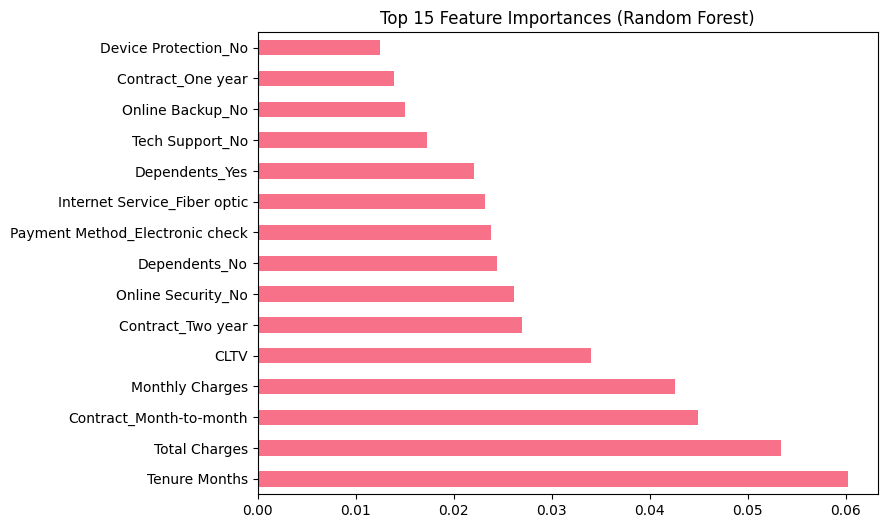

In [90]:
import matplotlib.pyplot as plt

# Get feature names
ohe = preprocessor.named_transformers_["cat"].named_steps["encoder"]
cat_features = list(ohe.get_feature_names_out(categorical_cols))
all_features = numeric_cols + cat_features

# Extract importances from tuned RF
importances = search.best_estimator_.feature_importances_

feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)[:15]
feat_imp.plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


In [91]:
# Drop churn columns
churn_related = ["Churn Label", "Churn Value", "Churn Score", "Churn Reason"]
X_unsup = df.drop(columns=churn_related)

# Transform features using same preprocessor
X_unsup_t = preprocessor.fit_transform(X_unsup)


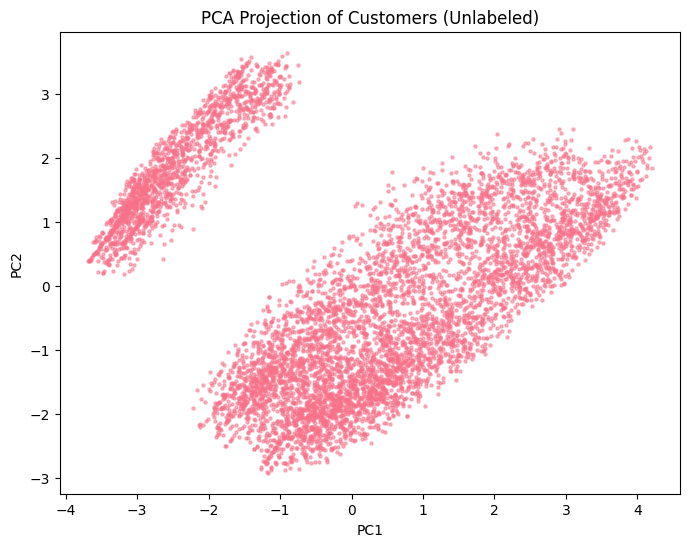

In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_unsup_t)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, alpha=0.5)
plt.title("PCA Projection of Customers (Unlabeled)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different k
scores = {}
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km_labels = km.fit_predict(X_unsup_t)
    scores[k] = silhouette_score(X_unsup_t, km_labels)

print(scores)


{2: 0.20377144345463422, 3: 0.20243708318788325, 4: 0.1574287867272714, 5: 0.13720322579422917, 6: 0.12365940098293886, 7: 0.09532814627938224, 8: 0.0867594402117696, 9: 0.08660091915490431}


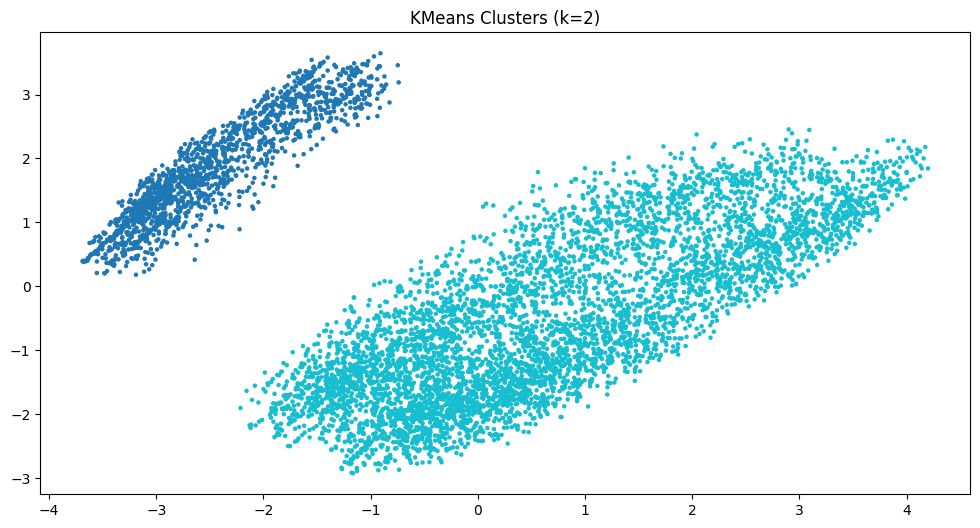

In [94]:
best_k = max(scores, key=scores.get)
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_unsup_t)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="tab10", s=5)
plt.title(f"KMeans Clusters (k={best_k})")
plt.show()


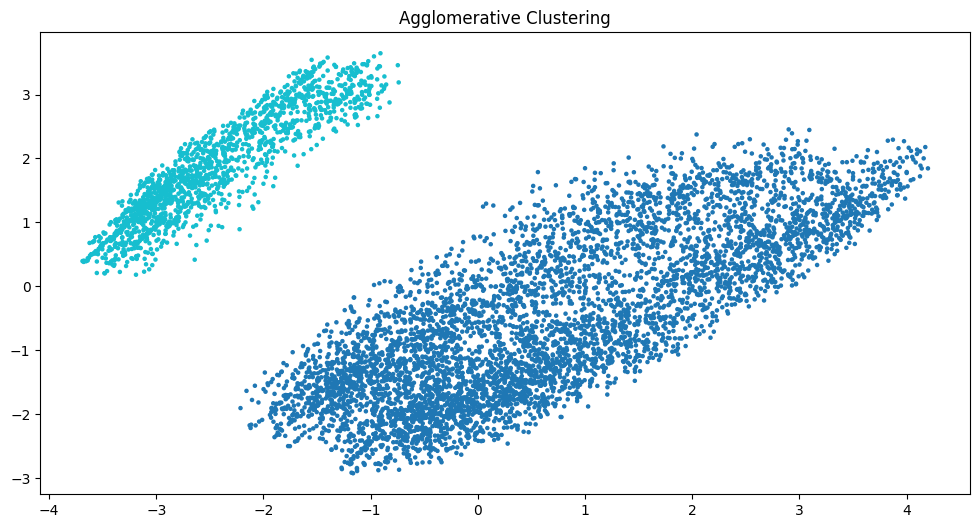

In [95]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=best_k)
agg_labels = agg.fit_predict(X_unsup_t)

plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap="tab10", s=5)
plt.title("Agglomerative Clustering")
plt.show()


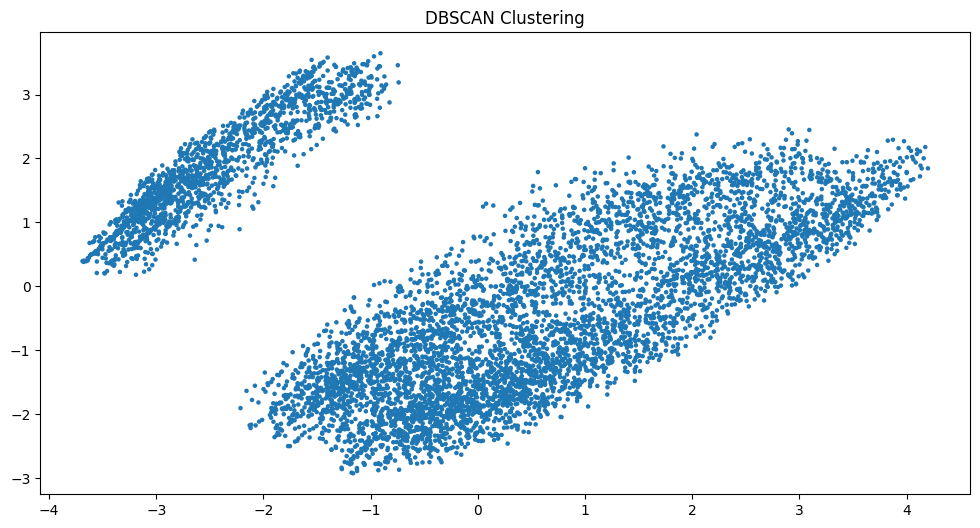

In [96]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.5, min_samples=10)
db_labels = db.fit_predict(X_unsup_t)

plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap="tab10", s=5)
plt.title("DBSCAN Clustering")
plt.show()


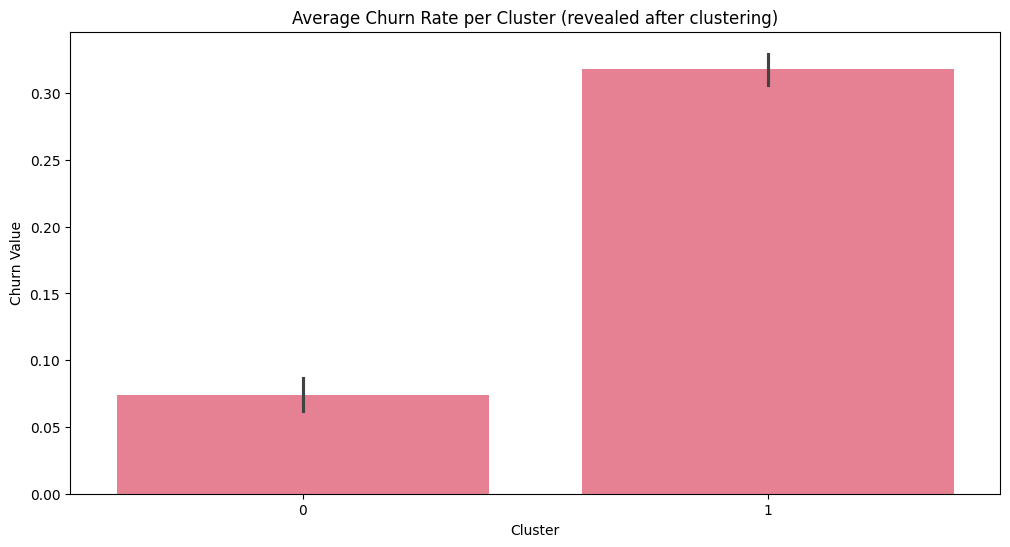

In [97]:
import seaborn as sns

df_clusters = df.copy()
df_clusters["Cluster"] = clusters  # from KMeans

# Compare churn rates per cluster
sns.barplot(x="Cluster", y="Churn Value", data=df_clusters)
plt.title("Average Churn Rate per Cluster (revealed after clustering)")
plt.show()


In [98]:
cluster_summary = df_clusters.groupby("Cluster").agg({
    "Tenure Months": "mean",
    "Monthly Charges": "mean",
    "Total Charges": "mean",
    "Churn Value": "mean"
})
print(cluster_summary)


         Tenure Months  Monthly Charges  Total Charges  Churn Value
Cluster                                                            
0            30.547182        21.079194     665.220329     0.074050
1            32.875657        76.844254    2729.505406     0.318289


In [99]:
# Contract distribution per cluster
print("\nContract distribution by cluster:")
print(pd.crosstab(df_clusters["Cluster"], df["Contract"], normalize="index").round(2))

# Internet Service
print("\nInternet Service by cluster:")
print(pd.crosstab(df_clusters["Cluster"], df["Internet Service"], normalize="index").round(2))

# Paperless Billing
print("\nPaperless Billing by cluster:")
print(pd.crosstab(df_clusters["Cluster"], df["Paperless Billing"], normalize="index").round(2))

# Add-ons (example: Streaming TV)
print("\nStreaming TV by cluster:")
print(pd.crosstab(df_clusters["Cluster"], df["Streaming TV"], normalize="index").round(2))



Contract distribution by cluster:
Contract  Month-to-month  One year  Two year
Cluster                                     
0                   0.34      0.24      0.42
1                   0.61      0.20      0.19

Internet Service by cluster:
Internet Service   DSL  Fiber optic   No
Cluster                                 
0                 0.00         0.00  1.0
1                 0.44         0.56  0.0

Paperless Billing by cluster:
Paperless Billing    No   Yes
Cluster                      
0                  0.71  0.29
1                  0.32  0.68

Streaming TV by cluster:
Streaming TV    No  No internet service   Yes
Cluster                                      
0             0.00                  1.0  0.00
1             0.51                  0.0  0.49


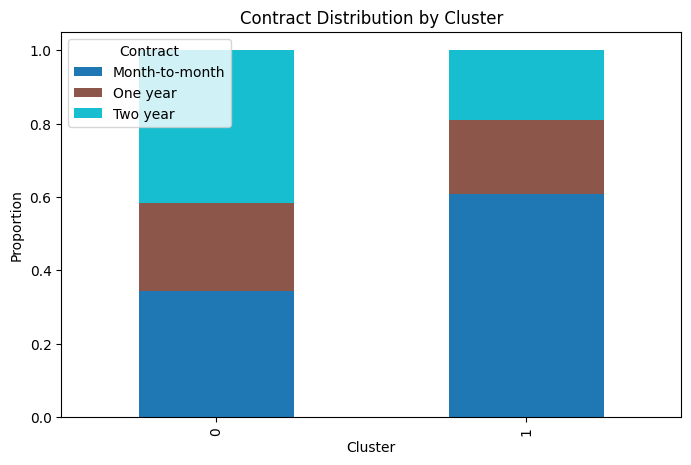

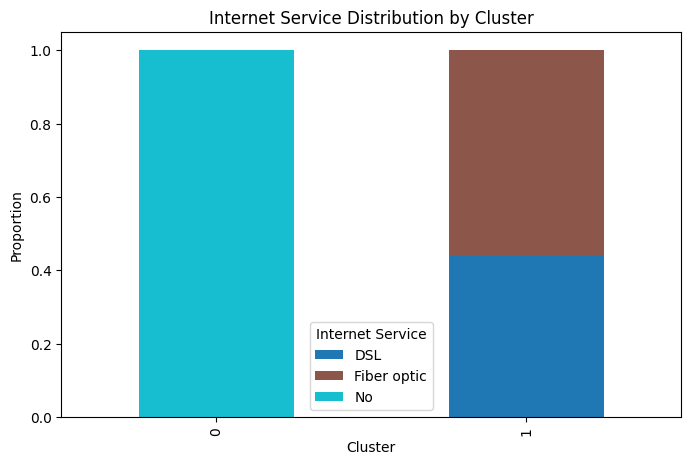

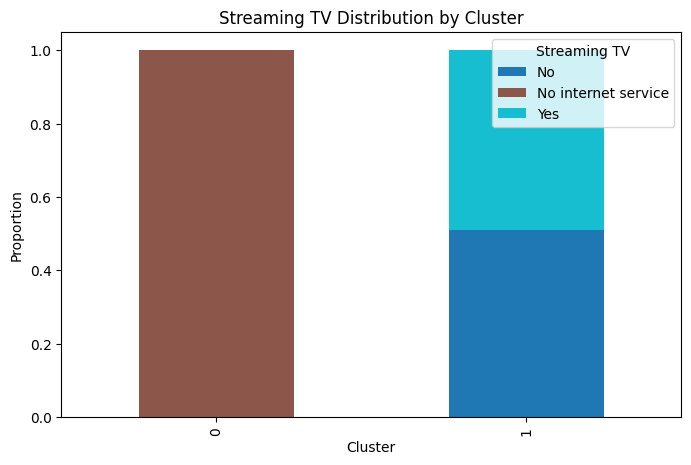

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_crosstab(feature):
    tab = pd.crosstab(df_clusters["Cluster"], df[feature], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(8,5), colormap="tab10")
    plt.title(f"{feature} Distribution by Cluster")
    plt.ylabel("Proportion")
    plt.show()

plot_cluster_crosstab("Contract")
plot_cluster_crosstab("Internet Service")
plot_cluster_crosstab("Streaming TV")


In [101]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(df["Churn Value"], df_clusters["Cluster"])
nmi = normalized_mutual_info_score(df["Churn Value"], df_clusters["Cluster"])

print("Adjusted Rand Index (ARI):", round(ari, 3))
print("Normalized Mutual Info (NMI):", round(nmi, 3))


Adjusted Rand Index (ARI): -0.065
Normalized Mutual Info (NMI): 0.057


In [102]:
df_with_clusters = df.copy()
df_with_clusters["Cluster"] = df_clusters["Cluster"]


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick important features for profiling
num_features = ["Tenure Months", "Monthly Charges", "Total Charges", "CLTV"]
cat_features = ["Contract", "Internet Service", "Partner", "Dependents", "Paperless Billing"]

# Numerical summary
cluster_num = df.groupby(df_clusters["Cluster"])[num_features].mean()

# Categorical summary (proportions)
cluster_cat = {}
for col in cat_features:
    tab = pd.crosstab(df_clusters["Cluster"], df[col], normalize="index")
    cluster_cat[col] = tab

# Combine into one dictionary
cluster_profiles = {"Numerical": cluster_num, "Categorical": cluster_cat}


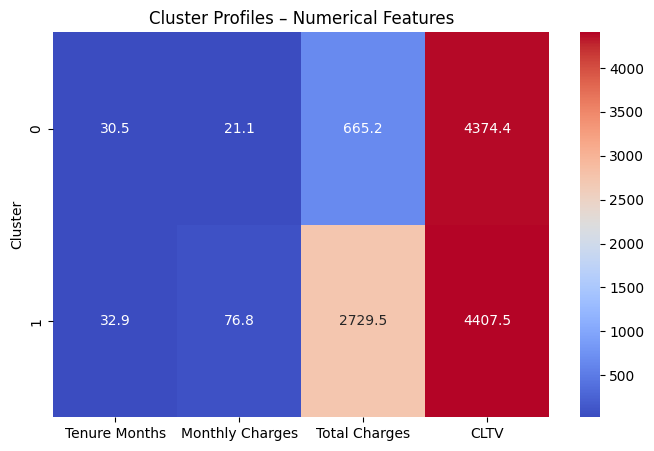

In [106]:
plt.figure(figsize=(8,5))
sns.heatmap(cluster_num, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Cluster Profiles – Numerical Features")
plt.show()


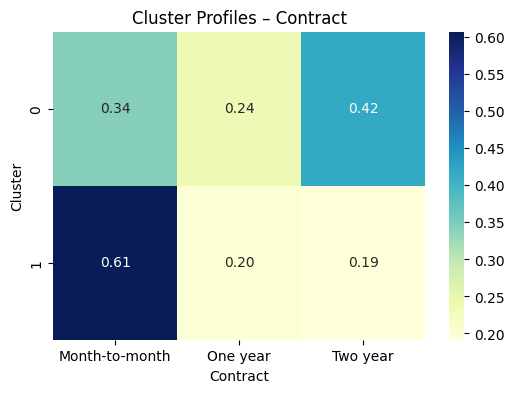

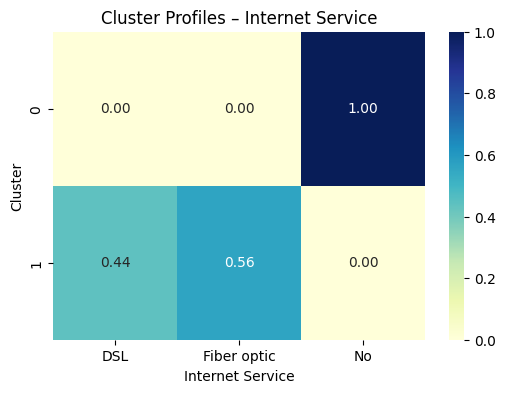

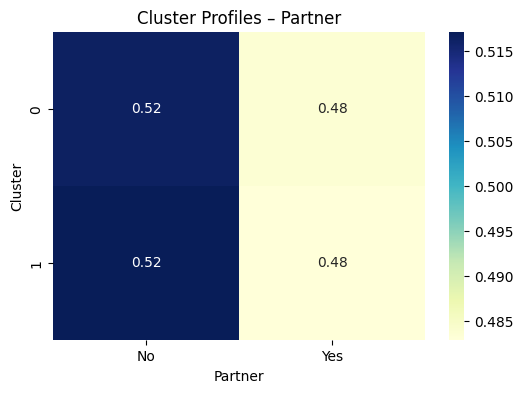

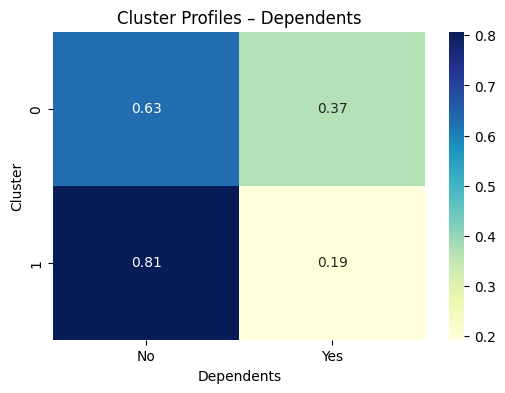

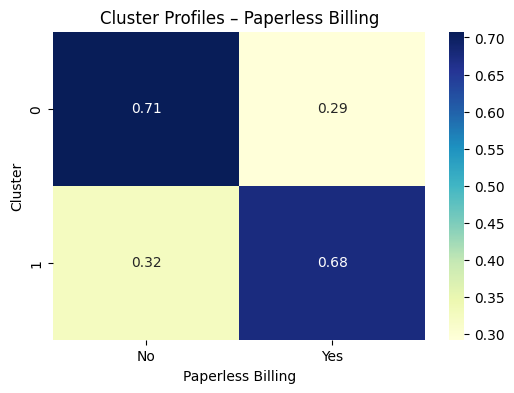

In [107]:
for col, tab in cluster_cat.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(tab, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"Cluster Profiles – {col}")
    plt.ylabel("Cluster")
    plt.show()
